# Model experiments
PCA와 t-SNE를 사용한 차원 축소의 효과에 대해 각각 비교하여 보고, clustering을 수행 후 t-SNE를 사용하여 결과를 시각화한다.

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_data(path):
    data=pd.read_csv(path, index_col=[0], header=[0, 1, 2])
    return data

# 데이터 불러오기
data = load_data("result_22000hz.csv")
pd.set_option('display.max_columns', None)
data.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
4666         -0.729028  0.832228 -0.513690 -0.700464 -0.818676 -1.229340   
10750        -0.379960  0.619170  0.062697 -1.015120  0.756527 -0.288884   
5578         -0.632830 -0.744761  1.307000 -0.089473 -0.014075 -1.075960   
9342         -0.427392  0.624676 -1.273800 -0.060483 -0.282734 -0.628239   
9424          0.562450 -0.322334 -0.526117 -1.065830 -0.981241  0.895980   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
4666       -0.543615  0.086986 -0.795790 -0.677729 -0.641343 -0.892135   
10750       1.189940 -1.452580 -0.853908 -0.796916  0.476290 -0.396949   
5578       -0.737363 -1.226090 -1.001870 -0.366164 -0.086157 -0.900775   
9342       -0.682002 -0.891044 -0.992580 -0.886848 -0.422428 -0.281096   
9424       -0.888102 -0.589333 -1.436570  0.156977 -0.749265 -0.766131   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
4666        0.544107  0.604034  0.414754  0.462633  0.624794  0.656278   
10750       0.442064  0.513720  0.420794  0.642864  0.565786  0.602308   
5578        0.679586  0.584733  0.563848  0.454904  0.487789  0.750612   
9342        0.478865  0.433245  0.527774  0.524504  0.565325  0.533487   
9424        0.491448  0.385233  0.620992  0.651575  0.623663  0.691128   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
4666        0.667936  0.583116  0.613986  0.666953  0.666598  0.598831   
10750       0.330514  0.513748  0.246647  0.443337  0.317393  0.404017   
5578        0.737776  0.731817  0.451476  0.396555  0.534723  0.553396   
9342        0.709599  0.743491  0.601329  0.511607  0.373566  0.591174   
9424        0.878250  0.615561  0.615091  0.651403  0.545569  0.500132   

feature                                                                 \
statistics      mean                                                     
number            01        02        03        04        05        06   
4666        0.284588  0.249800  0.193049  0.238775  0.315664  0.278817   
10750       0.235872  0.346961  0.230024  0.406954  0.412180  0.367868   
5578        0.286754  0.210008  0.134460  0.131369  0.170917  0.330451   
9342        0.179619  0.103197  0.194881  0.216957  0.219897  0.291707   
9424        0.127545  0.096227  0.288930  0.273375  0.222092  0.177525   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
4666        0.246120  0.141950  0.201622  0.220370  0.263412  0.300465   
10750       0.193360  0.211944  0.112435  0.250360  0.124142  0.195922   
5578        0.289042  0.390088  0.181282  0.135113  0.215374  0.327244   
9342        0.375506  0.424195  0.275593  0.256154  0.166929  0.233366   
9424        0.449238  0.208853  0.248760  0.222130  0.190737  0.221992   

feature                                                                 \
statistics    median                                                     
number            01        02        03        04        05        06   
4666        0.294625  0.251976  0.193162  0.251647  0.337930  0.275794   
10750       0.220105  0.347689  0.220557  0.403823  0.430291  0.377685   
5578        0.265473  0.185603  0.105753  0.122217  0.15

In [2]:
# Set default Matplotlib style
plt.rcParams["figure.figsize"] = (18,13)

## Elbow Method
Using Elbow method to get optimal K-Means clustering nums

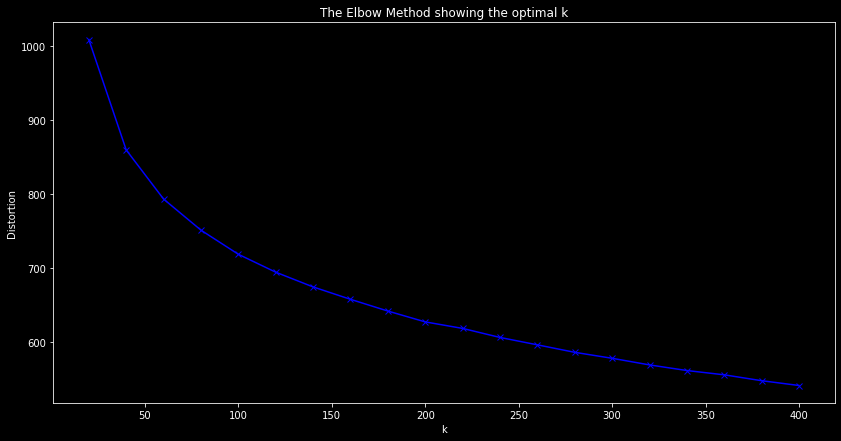

In [3]:
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist

distortions = []
K = range(20, 401, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

# Plot the elbow
plt.figure(figsize=(14,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## 0: t-SNE and PCA for raw data

In [4]:
data_labels=["_".join(a) for a in data.columns.to_flat_index()]

# t-sne 모델 생성 및 수행
from sklearn.manifold import TSNE

model_tsne = TSNE(n_components=2, learning_rate=300)
time_start=time.time()
tsne=pd.DataFrame(model_tsne.fit_transform(data), columns=['x1','x2'])
tsne.set_index(data.index, inplace=True)
print(f"t-SNE Done. Elepsed Time:{time.time()-time_start}")

# PCA 수행
from sklearn.decomposition import PCA

model_pca = PCA(n_components=2)
time_start=time.time()
pca = pd.DataFrame(model_pca.fit_transform(data), columns=['x1','x2'])
pca.set_index(data.index, inplace=True)
print(f"PCA Done. Elepsed Time:{time.time()-time_start}")


t-SNE Done. Elepsed Time:18.348388671875
PCA Done. Elepsed Time:0.14824390411376953


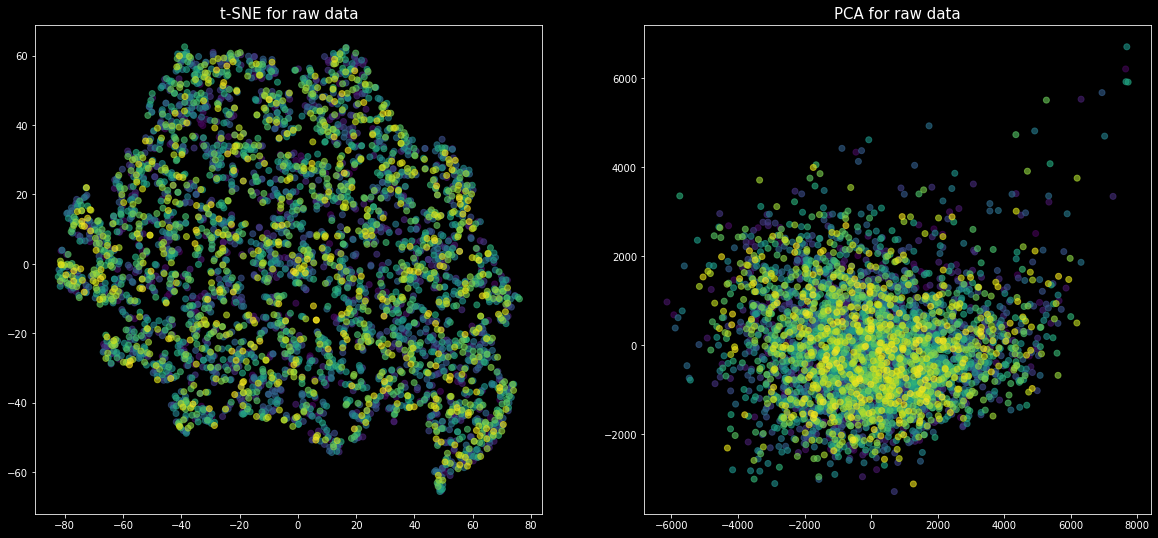

In [5]:
# t-SNE와 PCA 수행 결과 2차원 공간에 출력
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title("t-SNE for raw data", fontsize=15)
r0_plot_tsne=plt.scatter(tsne['x1'], tsne['x2'], c=range(0, tsne.shape[0]), cmap='viridis', alpha=0.6)

plt.subplot(1,2,2)
plt.title("PCA for raw data", fontsize=15)
r0_plot_pca=plt.scatter(pca['x1'], pca['x2'], c=range(0, pca.shape[0]), cmap='viridis', alpha=0.6)


## 1: K-Means Clustering for raw data

In [38]:
from sklearn.cluster import KMeans 

# 200개의 k-means clustering 모델 생성
kmeans = KMeans(n_clusters=200)
kmeans_50 = KMeans(n_clusters=50)
kemeans_30= KMeans(n_clusters=30)

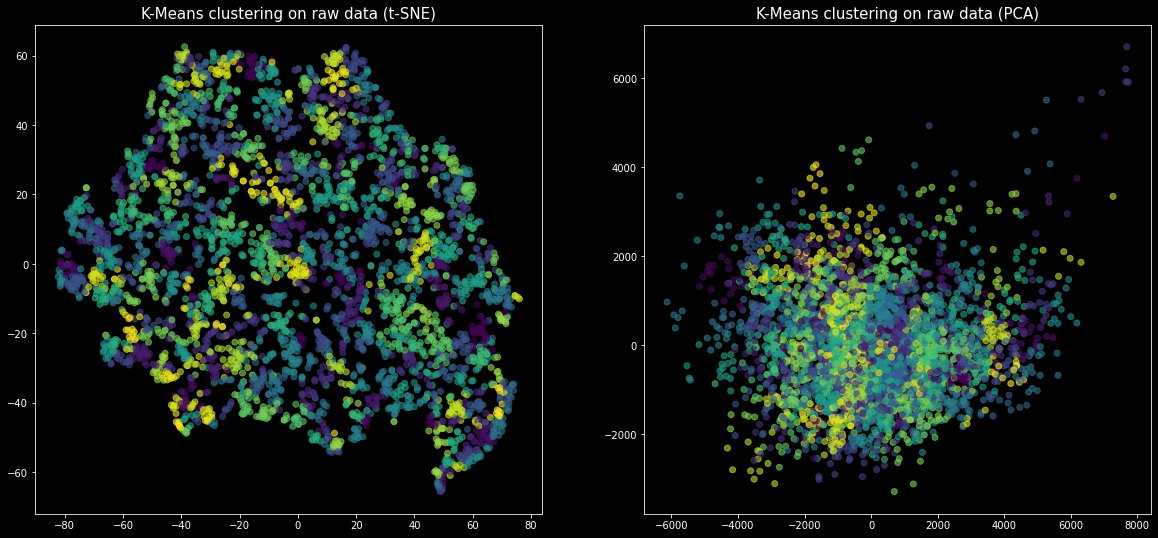

In [7]:
# run clustering
r1=pd.DataFrame(kmeans.fit_predict(data), columns=["cluster"])
r1.set_index(data.index, inplace=True)

# run t-SNE
# r1_data=data.copy()
# r1_data["clusters"]=r1.values
# r1_tsne=TSNE(n_components=n_components, learning_rate=300).fit_transform(r1_data)

# plt.title("t-SNE on K-Means clustering", fontsize=15)
# plt.scatter(r1_tsne[:,0], r1_tsne[:,1], c=r1.values, cmap='viridis', alpha=0.6)
# plt.colorbar()
# plt.show()

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title("K-Means clustering on raw data (t-SNE)", fontsize=15)
r1_plot1 = plt.scatter(tsne['x1'], tsne['x2'], c=r1.values, cmap='viridis', alpha=0.6)
plt.subplot(1,2,2)
plt.title("K-Means clustering on raw data (PCA)", fontsize=15)
r1_plot2 = plt.scatter(pca['x1'], pca['x2'], c=r1.values, cmap='viridis', alpha=0.6)
plt.show()

## 2: K-Means clustering after t-SNE

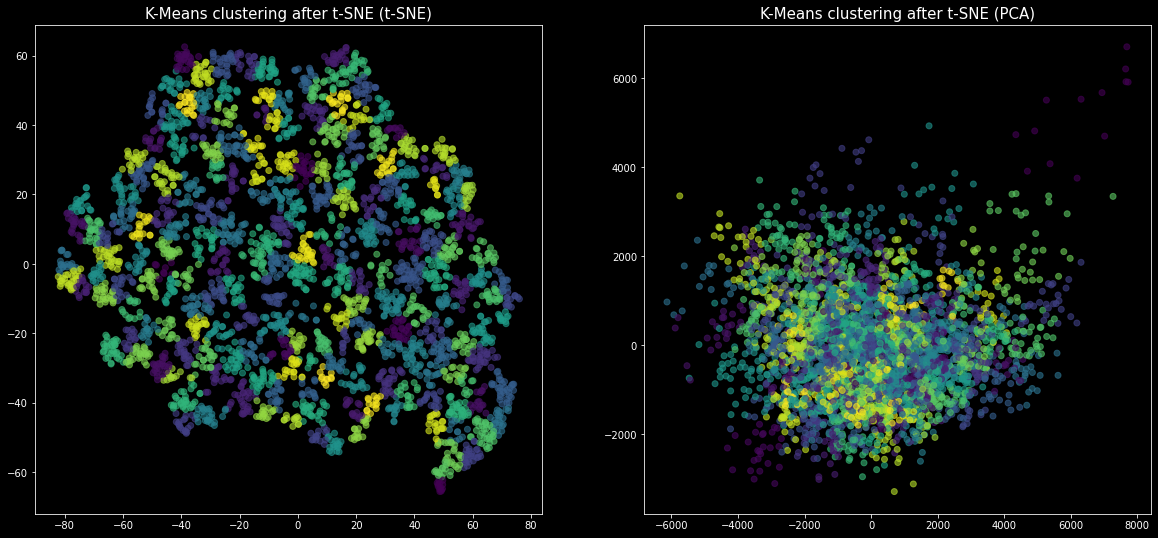

In [8]:
r2=pd.DataFrame(kmeans.fit_predict(tsne), columns=["cluster"])
r2.set_index(data.index, inplace=True)

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title("K-Means clustering after t-SNE (t-SNE)", fontsize=15)
r2_plot1 = plt.scatter(tsne['x1'], tsne['x2'], c=r2.values, cmap='viridis', alpha=0.6)
plt.subplot(1,2,2)
plt.title("K-Means clustering after t-SNE (PCA)", fontsize=15)
r2_plot2 = plt.scatter(pca['x1'], pca['x2'], c=r2.values, cmap='viridis', alpha=0.6)

## 3: K-Means clustering after PCA

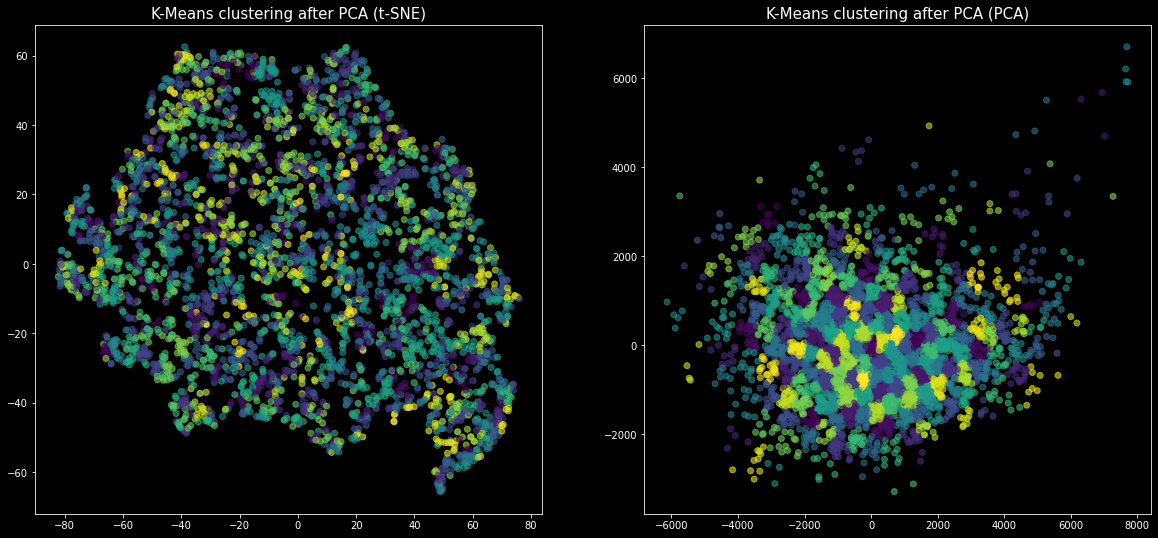

In [9]:
r3=pd.DataFrame(kmeans.fit_predict(pca), columns=["cluster"])
r3.set_index(data.index, inplace=True)

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title("K-Means clustering after PCA (t-SNE)", fontsize=15)
r3_plot1 = plt.scatter(tsne['x1'], tsne['x2'], c=r3.values, cmap='viridis', alpha=0.6)

plt.subplot(1,2,2)
plt.title("K-Means clustering after PCA (PCA)", fontsize=15)
r3_plot2 = plt.scatter(pca['x1'], pca['x2'], c=r3.values, cmap='viridis', alpha=0.6)


## Select reduced demension target for PCA

In [10]:
# 95% 분산 유지를 위한 최소한의 차원 수를 계산하여 PCA 모델에 적용
model_pca_opt = PCA(n_components=0.95)
pca_opt = model_pca_opt.fit_transform(data)
print(f"Number of demension: {model_pca_opt.n_components_}")

Number of demension: 4


## 4: K-Means Clustering for optimized PCA

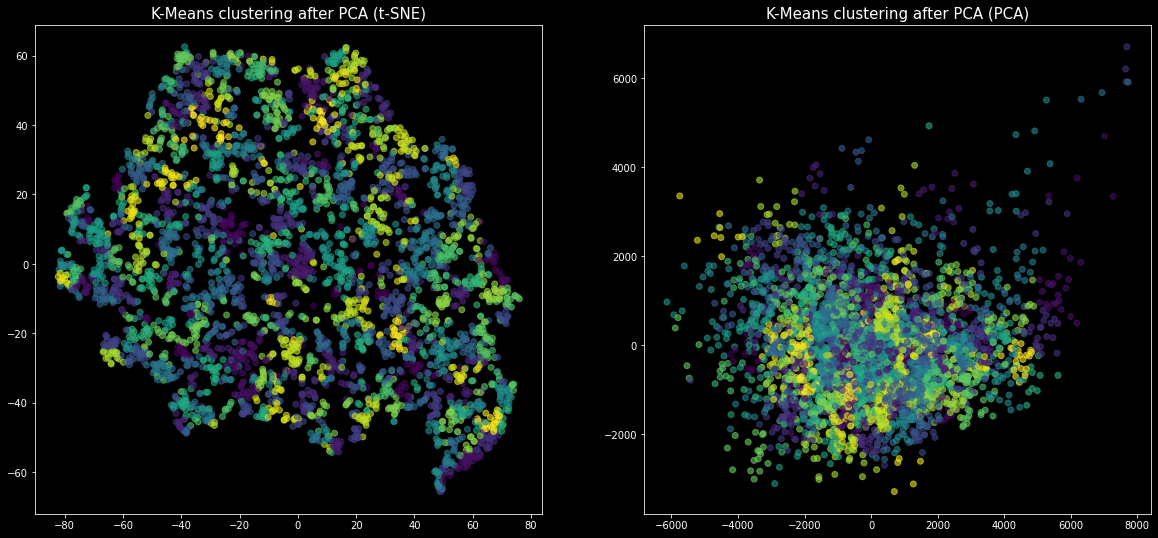

In [11]:
r4=pd.DataFrame(kmeans.fit_predict(pca_opt), columns=["cluster"])
r4.set_index(data.index, inplace=True)

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title("K-Means clustering after PCA (t-SNE)", fontsize=15)
r4_plot1 = plt.scatter(tsne['x1'], tsne['x2'], c=r4.values, cmap='viridis', alpha=0.6)

plt.subplot(1,2,2)
plt.title("K-Means clustering after PCA (PCA)", fontsize=15)
r4_plot2 = plt.scatter(pca['x1'], pca['x2'], c=r4.values, cmap='viridis', alpha=0.6)

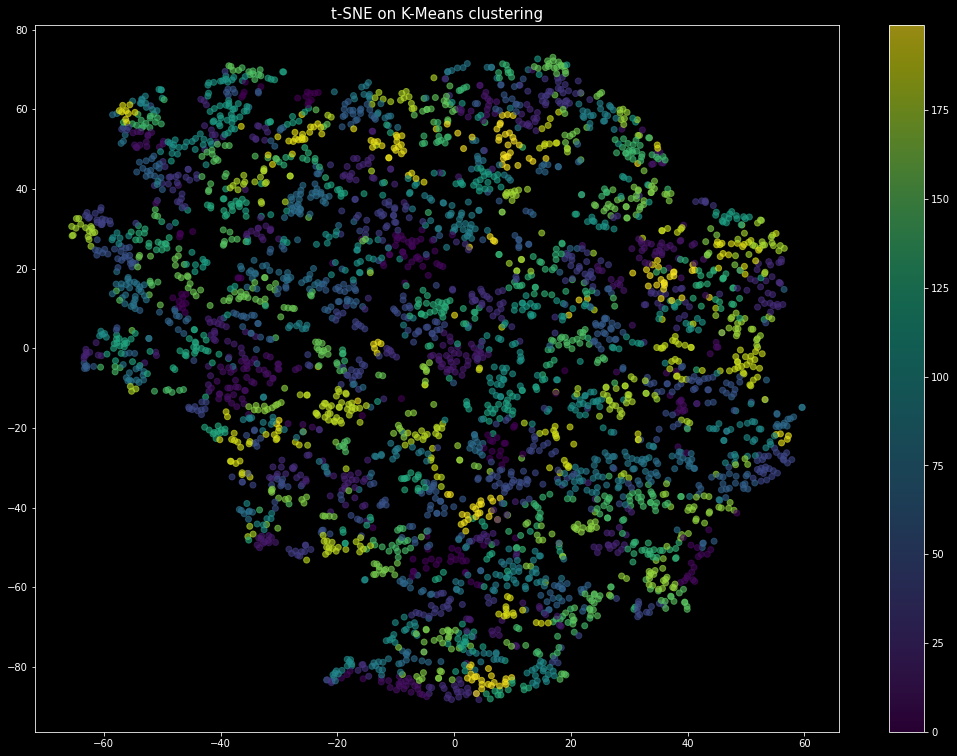

In [12]:
# run t-SNE
r4_data=data.copy()
r4_data["clusters"]=r4.values
r4_tsne=TSNE(n_components=n_components, learning_rate=300).fit_transform(r4_data)

plt.title("t-SNE on K-Means clustering", fontsize=15)
plt.scatter(r4_tsne[:,0], r4_tsne[:,1], c=r4.values, cmap='viridis', alpha=0.6)
plt.colorbar()
plt.show()

## Mimax Scaling

In [13]:
data.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
4666         -0.729028  0.832228 -0.513690 -0.700464 -0.818676 -1.229340   
10750        -0.379960  0.619170  0.062697 -1.015120  0.756527 -0.288884   
5578         -0.632830 -0.744761  1.307000 -0.089473 -0.014075 -1.075960   
9342         -0.427392  0.624676 -1.273800 -0.060483 -0.282734 -0.628239   
9424          0.562450 -0.322334 -0.526117 -1.065830 -0.981241  0.895980   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
4666       -0.543615  0.086986 -0.795790 -0.677729 -0.641343 -0.892135   
10750       1.189940 -1.452580 -0.853908 -0.796916  0.476290 -0.396949   
5578       -0.737363 -1.226090 -1.001870 -0.366164 -0.086157 -0.900775   
9342       -0.682002 -0.891044 -0.992580 -0.886848 -0.422428 -0.281096   
9424       -0.888102 -0.589333 -1.436570  0.156977 -0.749265 -0.766131   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
4666        0.544107  0.604034  0.414754  0.462633  0.624794  0.656278   
10750       0.442064  0.513720  0.420794  0.642864  0.565786  0.602308   
5578        0.679586  0.584733  0.563848  0.454904  0.487789  0.750612   
9342        0.478865  0.433245  0.527774  0.524504  0.565325  0.533487   
9424        0.491448  0.385233  0.620992  0.651575  0.623663  0.691128   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
4666        0.667936  0.583116  0.613986  0.666953  0.666598  0.598831   
10750       0.330514  0.513748  0.246647  0.443337  0.317393  0.404017   
5578        0.737776  0.731817  0.451476  0.396555  0.534723  0.553396   
9342        0.709599  0.743491  0.601329  0.511607  0.373566  0.591174   
9424        0.878250  0.615561  0.615091  0.651403  0.545569  0.500132   

feature                                                                 \
statistics      mean                                                     
number            01        02        03        04        05        06   
4666        0.284588  0.249800  0.193049  0.238775  0.315664  0.278817   
10750       0.235872  0.346961  0.230024  0.406954  0.412180  0.367868   
5578        0.286754  0.210008  0.134460  0.131369  0.170917  0.330451   
9342        0.179619  0.103197  0.194881  0.216957  0.219897  0.291707   
9424        0.127545  0.096227  0.288930  0.273375  0.222092  0.177525   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
4666        0.246120  0.141950  0.201622  0.220370  0.263412  0.300465   
10750       0.193360  0.211944  0.112435  0.250360  0.124142  0.195922   
5578        0.289042  0.390088  0.181282  0.135113  0.215374  0.327244   
9342        0.375506  0.424195  0.275593  0.256154  0.166929  0.233366   
9424        0.449238  0.208853  0.248760  0.222130  0.190737  0.221992   

feature                                                                 \
statistics    median                                                     
number            01        02        03        04        05        06   
4666        0.294625  0.251976  0.193162  0.251647  0.337930  0.275794   
10750       0.220105  0.347689  0.220557  0.403823  0.430291  0.377685   
5578        0.265473  0.185603  0.105753  0.122217  0.15

In [21]:
# data_clean=data.copy()
# data_clean.drop(["chroma_cqt", "chroma_stft"], axis=1, inplace=True)
# data_clean.drop("kurtosis", axis=1, level=1)

# Min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler(feature_range=(0,1))
data_minmax = pd.DataFrame(data)
data_minmax.iloc[:,:]=scaler_minmax.fit_transform(data)
data_minmax.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
4666          0.045344  0.068909  0.044103  0.061192  0.028347  0.030755   
10750         0.061593  0.063363  0.064280  0.044624  0.072217  0.081957   
5578          0.049822  0.027856  0.107840  0.093363  0.050756  0.039106   
9342          0.059385  0.063506  0.017493  0.094889  0.043273  0.063481   
9424          0.105462  0.038853  0.043667  0.041954  0.023820  0.146464   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
4666        0.045467  0.085787  0.031971  0.029549  0.014636  0.026768   
10750       0.109016  0.012466  0.029811  0.025814  0.029603  0.041252   
5578        0.038365  0.023252  0.024314  0.039313  0.022071  0.026515   
9342        0.040394  0.039209  0.024660  0.022995  0.017568  0.044640   
9424        0.032839  0.053578  0.008165  0.055709  0.013191  0.030453   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
4666        0.506415  0.559879  0.260511  0.382400  0.602502  0.610608   
10750       0.395376  0.457794  0.268148  0.590093  0.539988  0.549347   
5578        0.653838  0.538063  0.449013  0.373493  0.457357  0.717686   
9342        0.435421  0.366829  0.403404  0.453698  0.539500  0.471229   
9424        0.449114  0.312560  0.521261  0.600132  0.601304  0.650166   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
4666        0.655170  0.566812  0.611065  0.678599  0.672734  0.590473   
10750       0.282041  0.491954  0.227179  0.437382  0.314254  0.386824   
5578        0.732400  0.727281  0.441234  0.386918  0.537356  0.542978   
9342        0.701241  0.739879  0.597838  0.511026  0.371919  0.582469   
9424        0.887739  0.601824  0.612219  0.661825  0.548490  0.487298   

feature                                                                 \
statistics      mean                                                     
number            01        02        03        04        05        06   
4666        0.431833  0.357556  0.250514  0.248081  0.402631  0.424625   
10750       0.353745  0.507921  0.302908  0.442580  0.527612  0.565512   
5578        0.435305  0.295974  0.167492  0.123867  0.215194  0.506315   
9342        0.263576  0.130674  0.253110  0.222849  0.278620  0.445018   
9424        0.180106  0.119887  0.386380  0.288096  0.281462  0.264373   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
4666        0.389958  0.243421  0.378277  0.461689  0.437709  0.558134   
10750       0.302547  0.372865  0.210189  0.525084  0.205500  0.361224   
5578        0.461070  0.702316  0.339943  0.281467  0.357614  0.608573   
9342        0.604321  0.765392  0.517688  0.537332  0.276840  0.431751   
9424        0.726477  0.367148  0.467117  0.465409  0.316536  0.410327   

feature                                                                 \
statistics    median                                                     
number            01        02        03        04        05        06   
4666        0.432233  0.330847  0.247725  0.273913  0.415677  0.395824   
10750       0.322908  0.456520  0.282858  0.439554  0.529288  0.542059   
5578        0.389466  0.243699  0.135625  0.133031  0.19

In [22]:

# Standardization
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
data_standard = pd.DataFrame(data)
data_standard.iloc[:,:]=scaler_standard.fit_transform(data)
data_standard.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
4666         -0.582441  0.648633 -0.302944 -0.448941 -0.496494 -0.826499   
10750        -0.370180  0.490644  0.134786 -0.696837  0.636157 -0.138281   
5578         -0.523945 -0.520752  1.079757  0.032416  0.082056 -0.714257   
9342         -0.399023  0.494727 -0.880200  0.055256 -0.111124 -0.386618   
9424          0.202877 -0.207510 -0.312381 -0.736788 -0.613386  0.728792   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
4666       -0.300066  0.036716 -0.587546 -0.545549 -0.493883 -0.631693   
10750       1.008490 -0.979797 -0.617554 -0.592063 -0.093161 -0.440883   
5578       -0.446314 -0.830255 -0.693950 -0.423959 -0.294824 -0.635022   
9342       -0.404526 -0.609038 -0.689153 -0.627159 -0.415392 -0.396241   
9424       -0.560098 -0.409830 -0.918396 -0.219799 -0.532578 -0.583140   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
4666       -0.007173  0.105537 -1.740956 -1.463636 -0.063981  0.277237   
10750      -0.693824 -0.595308 -1.691666 -0.009178 -0.506161 -0.137656   
5578        0.904471 -0.044240 -0.524270 -1.526009 -1.090637  1.002427   
9342       -0.446189 -1.219802 -0.818653 -0.964340 -0.509616 -0.666715   
9424       -0.361517 -1.592380 -0.057945  0.061119 -0.072456  0.545146   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
4666        0.504802  0.048977  0.741571  1.317069  1.262828  0.649221   
10750      -2.133977 -0.465752 -1.965952 -0.234700 -1.038452 -0.550677   
5578        1.050979  1.152376 -0.456232 -0.559341  0.393765  0.369378   
9342        0.830623  1.239000  0.648281  0.239055 -0.668269  0.602060   
9424        2.149543  0.289727  0.749715  1.209161  0.465240  0.041314   

feature                                                                 \
statistics      mean                                                     
number            01        02        03        04        05        06   
4666        0.786904 -0.367185 -1.257611 -0.802007  0.326375  0.268587   
10750       0.193690  0.722909 -0.891424  0.865428  1.338644  1.331407   
5578        0.813279 -0.813630 -1.837855 -1.866899 -1.191747  0.884837   
9342       -0.491302 -2.011991 -1.239467 -1.018324 -0.678040  0.422429   
9424       -1.125406 -2.090193 -0.308040 -0.458960 -0.655018 -0.940328   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
4666        0.047971 -1.004197  0.387777  0.907929  1.311043  1.546773   
10750      -0.640775 -0.084085 -0.936141  1.332590 -0.458013  0.334438   
5578        0.608289  2.257721  0.085844 -0.299315  0.700847  1.857317   
9342        1.737018  2.706077  1.485824  1.414633  0.085482  0.768658   
9424        2.699539 -0.124718  1.087507  0.932851  0.387900  0.636760   

feature                                                                 \
statistics    median                                                     
number            01        02        03        04        05        06   
4666        0.978026 -0.236972 -1.071133 -0.537128  0.621813  0.413518   
10750       0.150482  0.721491 -0.831174  0.797176  1.467059  1.453881   
5578        0.654293 -0.901626 -1.836769 -1.671990 -1.02

Min-Max Scaling을 수행한 데이터에 대해 차원 축소 수행

In [25]:
# t-sne 모델 생성 및 수행
from sklearn.manifold import TSNE

model_tsne = TSNE(n_components=2, learning_rate=300)
time_start=time.time()
tsne_minmax=pd.DataFrame(model_tsne.fit_transform(data_minmax), columns=['x1','x2'])
tsne_minmax.set_index(data_minmax.index, inplace=True)
print(f"t-SNE Done. Elepsed Time:{time.time()-time_start}")

# PCA 수행
from sklearn.decomposition import PCA

model_pca = PCA(n_components=2)
time_start=time.time()
pca_minmax = pd.DataFrame(model_pca.fit_transform(data_minmax), columns=['x1','x2'])
pca_minmax.set_index(data_minmax.index, inplace=True)
print(f"PCA Done. Elepsed Time:{time.time()-time_start}")


t-SNE Done. Elepsed Time:24.705620050430298
PCA Done. Elepsed Time:0.1001889705657959


## PCA and t-SNE for minmax data

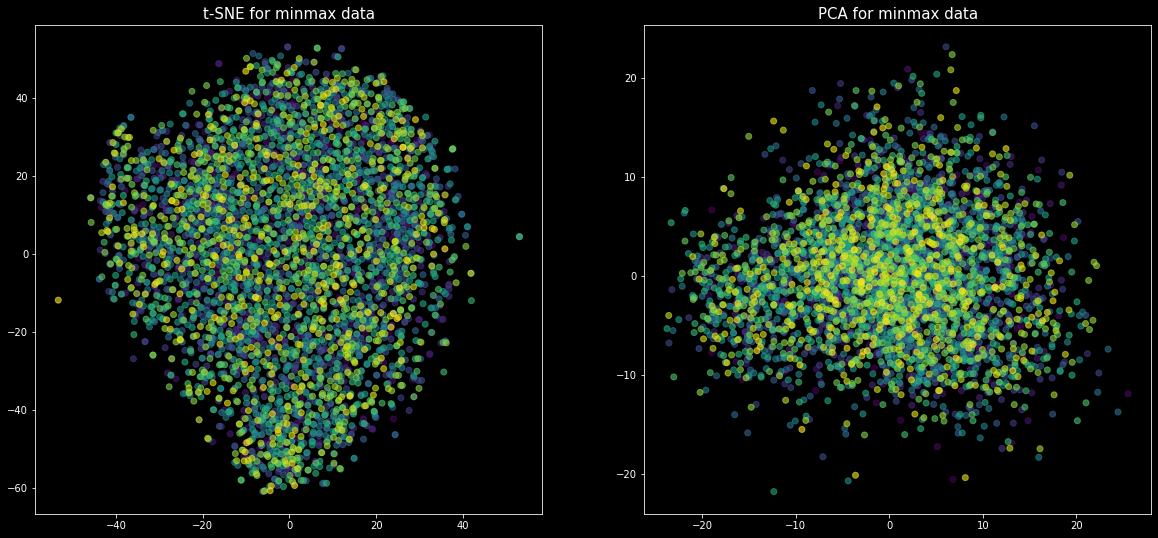

In [29]:
# t-SNE와 PCA 수행 결과 2차원 공간에 출력
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title("t-SNE for minmax data", fontsize=15)
r0_plot_tsne=plt.scatter(tsne_minmax['x1'], tsne_minmax['x2'], c=range(0, tsne.shape[0]), cmap='viridis', alpha=0.6)

plt.subplot(1,2,2)
plt.title("PCA for minmax data", fontsize=15)
r0_plot_pca=plt.scatter(pca_minmax['x1'], pca_minmax['x2'], c=range(0, pca.shape[0]), cmap='viridis', alpha=0.6)


## 5: K-Means with PCA, minmax scaling

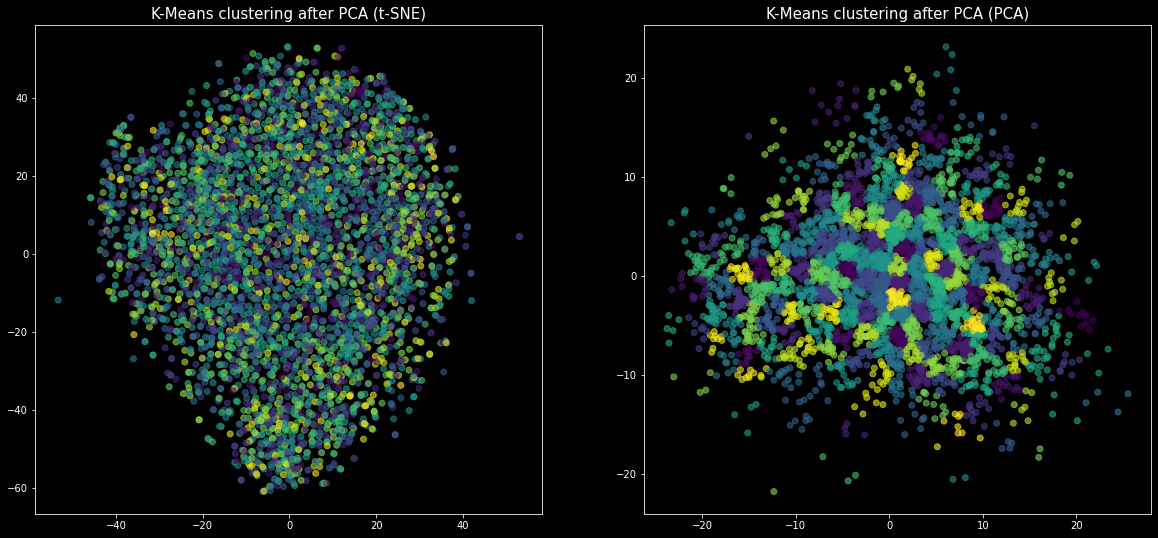

In [35]:
r5=pd.DataFrame(kmeans.fit_predict(pca_minmax), columns=["cluster"])
r5.set_index(data.index, inplace=True)

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title("K-Means clustering after PCA (t-SNE)", fontsize=15)
r5_plot1 = plt.scatter(tsne_minmax['x1'], tsne_minmax['x2'], c=r5.values, cmap='viridis', alpha=0.6)

plt.subplot(1,2,2)
plt.title("K-Means clustering after PCA (PCA)", fontsize=15)
r5_plot2 = plt.scatter(pca_minmax['x1'], pca_minmax['x2'], c=r5.values, cmap='viridis', alpha=0.6)

## 6: K-Means with optimized PCA, minmax scaling

Number of demension: 200


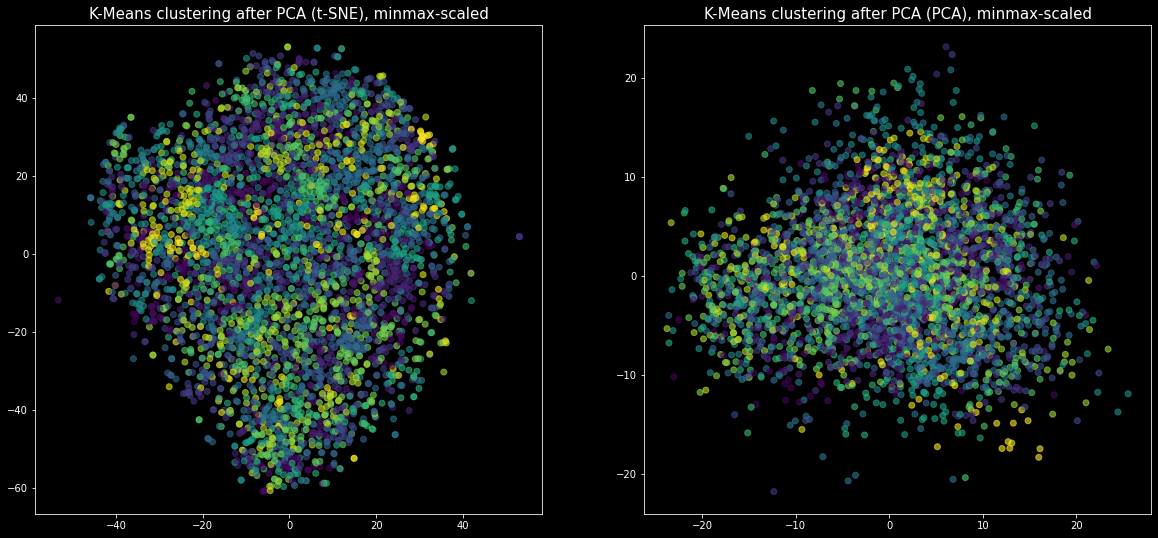

In [36]:
model_pca_opt = PCA(n_components=0.95)
pca_opt_minmax = model_pca_opt.fit_transform(data_minmax)
print(f"Number of demension: {model_pca_opt.n_components_}")

r6=pd.DataFrame(kmeans.fit_predict(pca_opt_minmax), columns=["cluster"])
r6.set_index(data.index, inplace=True)

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title("K-Means clustering after PCA (t-SNE), minmax-scaled", fontsize=15)
r6_plot1 = plt.scatter(tsne_minmax['x1'], tsne_minmax['x2'], c=r6.values, cmap='viridis', alpha=0.6)

plt.subplot(1,2,2)
plt.title("K-Means clustering after PCA (PCA), minmax-scaled", fontsize=15)
r6_plot2 = plt.scatter(pca_minmax['x1'], pca_minmax['x2'], c=r6.values, cmap='viridis', alpha=0.6)

## 7: K-Means with t-SNE, minmax scaling

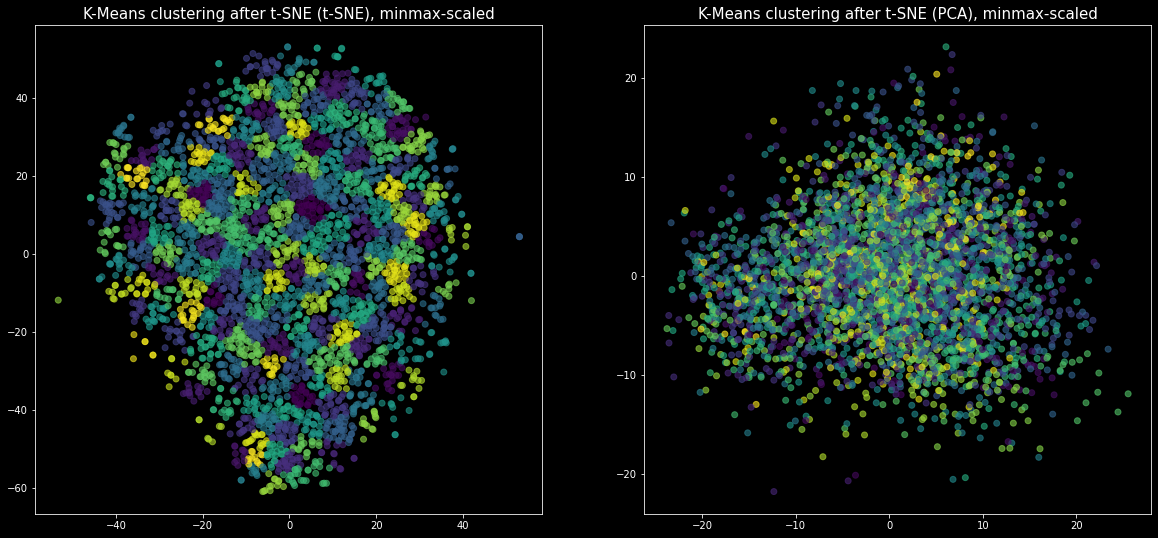

In [37]:
r7=pd.DataFrame(kmeans.fit_predict(tsne_minmax), columns=["cluster"])
r7.set_index(data.index, inplace=True)

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title("K-Means clustering after t-SNE (t-SNE), minmax-scaled", fontsize=15)
r7_plot1 = plt.scatter(tsne_minmax['x1'], tsne_minmax['x2'], c=r7.values, cmap='viridis', alpha=0.6)

plt.subplot(1,2,2)
plt.title("K-Means clustering after t-SNE (PCA), minmax-scaled", fontsize=15)
r7_plot2 = plt.scatter(pca_minmax['x1'], pca_minmax['x2'], c=r7.values, cmap='viridis', alpha=0.6)

## 8: K-Means with t-SNE, minmax scaling, 50 clusters

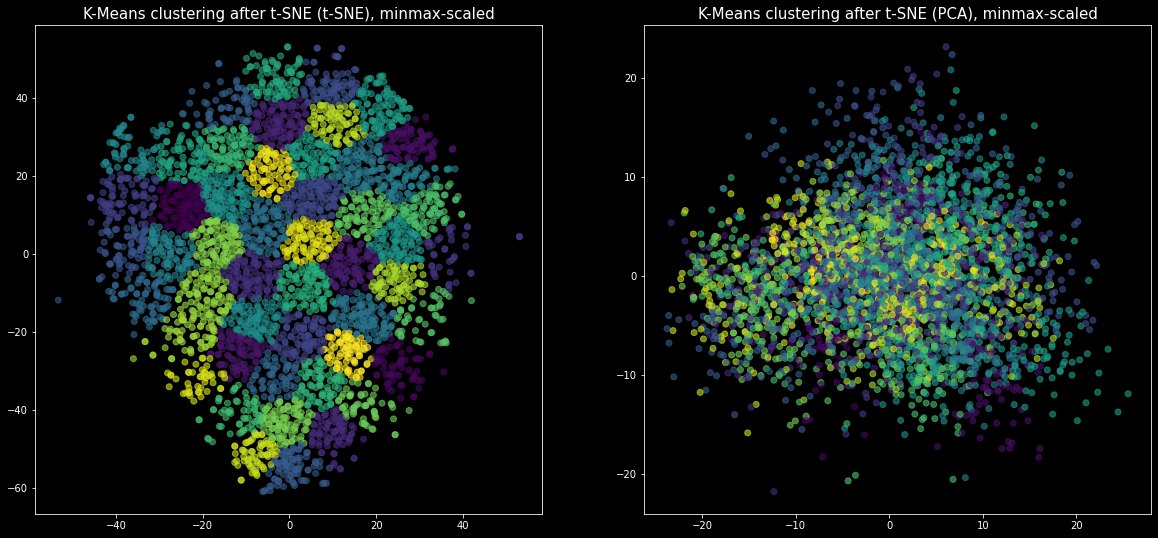

In [39]:
r8=pd.DataFrame(kmeans_50.fit_predict(tsne_minmax), columns=["cluster"])
r8.set_index(data.index, inplace=True)

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.title("K-Means clustering after t-SNE (t-SNE), minmax-scaled", fontsize=15)
r8_plot1 = plt.scatter(tsne_minmax['x1'], tsne_minmax['x2'], c=r8.values, cmap='viridis', alpha=0.6)

plt.subplot(1,2,2)
plt.title("K-Means clustering after t-SNE (PCA), minmax-scaled", fontsize=15)
r8_plot2 = plt.scatter(pca_minmax['x1'], pca_minmax['x2'], c=r8.values, cmap='viridis', alpha=0.6)